In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
ol = pd.read_csv(r"C:\Users\USER\Documents\Olympic data set.csv", encoding="latin-1")  


In [7]:
ol

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold


In [8]:
ol.head(2)

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze


# top 25 atheletes

In [12]:
gold_medals = ol[ol['Medal'] == 'Gold']
top_athletes = gold_medals['Athlete'].value_counts().head(25)
print(top_athletes)


Athlete
PHELPS, Michael          14
LEWIS, Carl               9
BIONDI, Matthew           8
THOMPSON, Jenny           8
FISCHER, Birgit           8
SCHERBO, Vitaly           6
OTTO, Kristin             6
ANDRIANOV, Nikolay        6
VAN DYKEN, Amy            6
LIPA, Elisabeta           5
REDGRAVE, Steven          5
WERTH, Isabell            5
COMANECI, Nadia           5
KIM, Nelli                5
VEZZALI, Valentina        5
THORPE, Ian               5
PEIRSOL, Aaron            5
EGERSZEGI, Krisztina      5
HALL, Gary Jr.            5
ANDRUNACHE, Georgeta      5
JOHNSON, Michael          4
PINSENT, Matthew          4
SZABO, Ecaterina          4
IGNAT, Doina              4
UPHOFF-BECKER, Nicole     4
Name: count, dtype: int64


# Medals by each gender 

In [15]:
Medals_by_sport_gender = ol.groupby(['Sport', 'Gender'])['Medal'].count().unstack()
print(Medals_by_sport_gender)


Gender                Men   Women
Sport                            
Aquatics           1156.0  1054.0
Archery              81.0    81.0
Athletics           831.0   692.0
Badminton            60.0    60.0
Baseball            335.0     NaN
Basketball          323.0   323.0
Boxing              416.0     NaN
Canoe / Kayak       492.0   180.0
Cycling             384.0    99.0
Equestrian          281.0   142.0
Fencing             415.0   191.0
Football            461.0   208.0
Gymnastics          375.0   408.0
Handball            393.0   387.0
Hockey              434.0   383.0
Judo                256.0   140.0
Modern Pentathlon    72.0     9.0
Rowing              786.0   591.0
Sailing             333.0    84.0
Shooting            235.0   110.0
Softball              NaN   180.0
Table Tennis         60.0    60.0
Taekwondo            40.0    40.0
Tennis               60.0    58.0
Triathlon             9.0     9.0
Volleyball          347.0   348.0
Weightlifting       248.0    63.0
Wrestling     

# Medal distribution

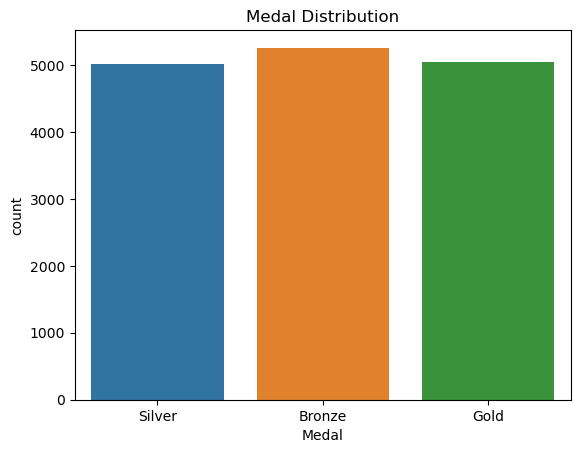

In [16]:
sns.countplot(x='Medal', data=ol)
plt.title('Medal Distribution')
plt.show()

# Top 15 Countries medals

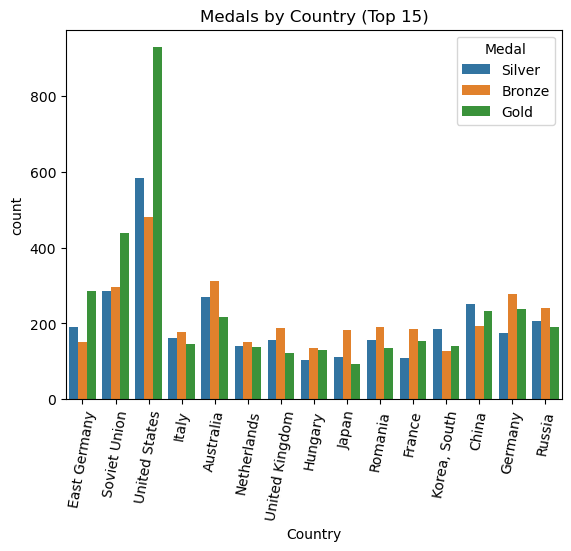

In [17]:
Top_countries = ol['Country'].value_counts().head(15).index
ol_top_countries = ol[ol['Country'].isin(Top_countries)]
sns.countplot(x='Country', hue='Medal', data=ol_top_countries)
plt.xticks(rotation=80)
plt.title('Medals by Country (Top 15)')
plt.show()

# Flow graph of winning bronze

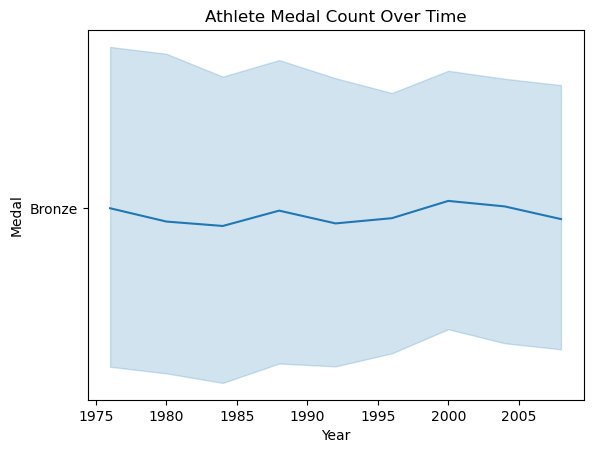

In [20]:
sns.lineplot(x='Year', y='Medal', data=ol)
plt.title('Athlete Medal Count Over Time')
plt.show()

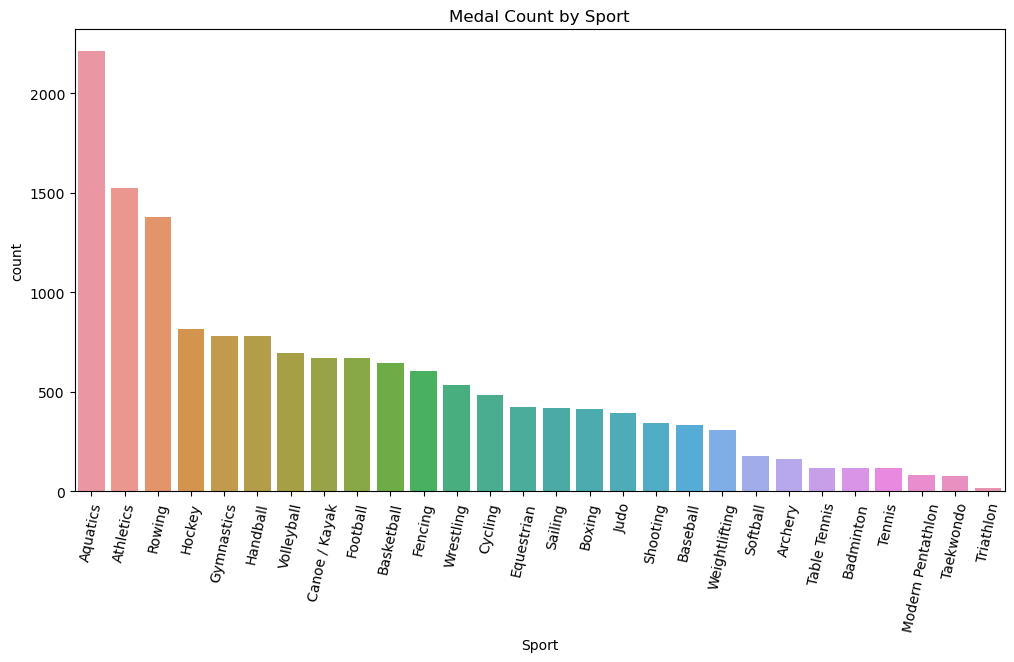

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Sport', data=ol, order=ol['Sport'].value_counts().index)
plt.title('Medal Count by Sport')
plt.xticks(rotation=78)
plt.show()


# Top athelets graph with name

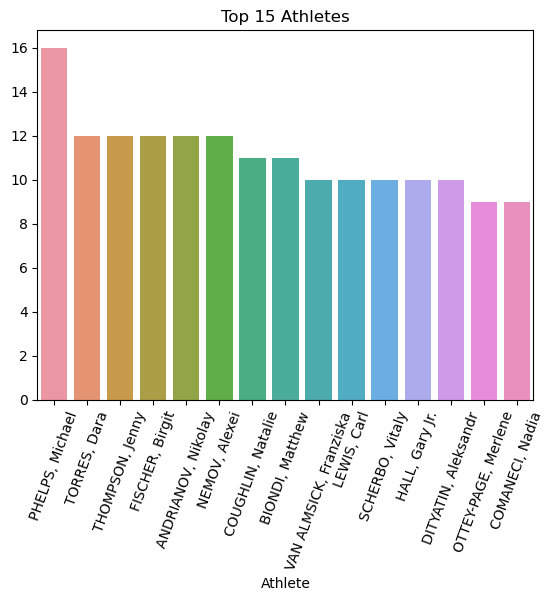

In [25]:
top_15_athletes = ol['Athlete'].value_counts().head(15)


sns.barplot(x=top_15_athletes.index, y=top_15_athletes.values)
plt.title('Top 15 Athletes')
plt.xticks(rotation=70)
plt.show()

# Medal comparison in between 3 types of major sports

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


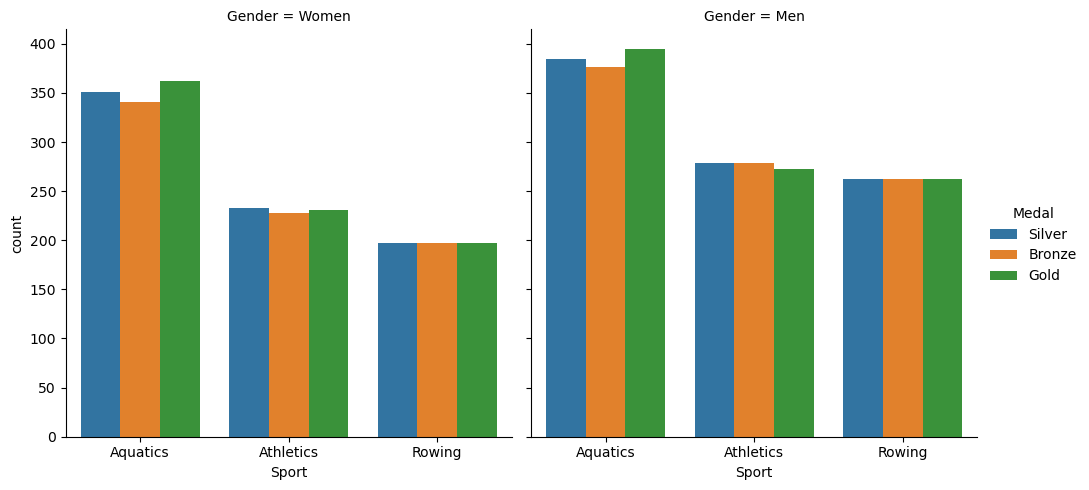

In [35]:

ol_filtered = ol.groupby('Sport')['Medal'].count()
ol_filtered = ol_filtered[ol_filtered > 300]
ol = ol[ol['Sport'].isin(ol_filtered.index)]




sns.catplot(x='Sport', hue='Medal', col='Gender', data=ol, kind='count', col_wrap=2)
plt.show()
